In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

In [7]:
np.random.seed(42)

n_samples = 100

data = {
    'followers': np.random.randint(1000, 10000, n_samples),
    'engagement_rate': np.random.uniform(0.01, 0.2, n_samples),
    'posts_per_month': np.random.randint(5, 50, n_samples),
    'niche': np.random.choice(['lifestyle', 'gaming', 'fitnes', 'tech'], n_samples)
}

df = pd.DataFrame(data)

df['monthly_income'] = (
    0.05 * df['followers'] +
    200 * df['engagement_rate'] +
    50 * df['posts_per_month'] +
    np.random.normal(0, 1000, n_samples)
)

df.head()

,followers,engagement_rate,posts_per_month,niche,monthly_income
0,8270,0.116636,6,tech,368.377261
1,1860,0.082756,5,lifestyle,516.753076
2,6390,0.194625,16,lifestyle,1042.951650
3,6191,0.171294,9,fitnes,1625.517302
4,6734,0.147129,41,gaming,2096.770644


In [9]:
X = df[['followers', 'engagement_rate', 'posts_per_month']]
y = df['monthly_income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Treningowe: {X_train.shape}, Testowe: {X_test.shape}")

Treningowe: (80, 3), Testowe: (20, 3)


In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

beta_0 = model.intercept_
beta_1 = model.coef_

print("Równanie regresji:")
print(f"monthly_income = {beta_0:.2f} + {beta_1[0]:.2} * followers + {beta_1[1]:.2f} * engagement_rate + {beta_1[2]:.2f} * posts_per_month")

Równanie regresji:
monthly_income = -71.25 + 0.058 * followers + 2894.51 * engagement_rate + 46.79 * posts_per_month


In [12]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error (MSE): 1036628.58
R^2 Score: 0.33


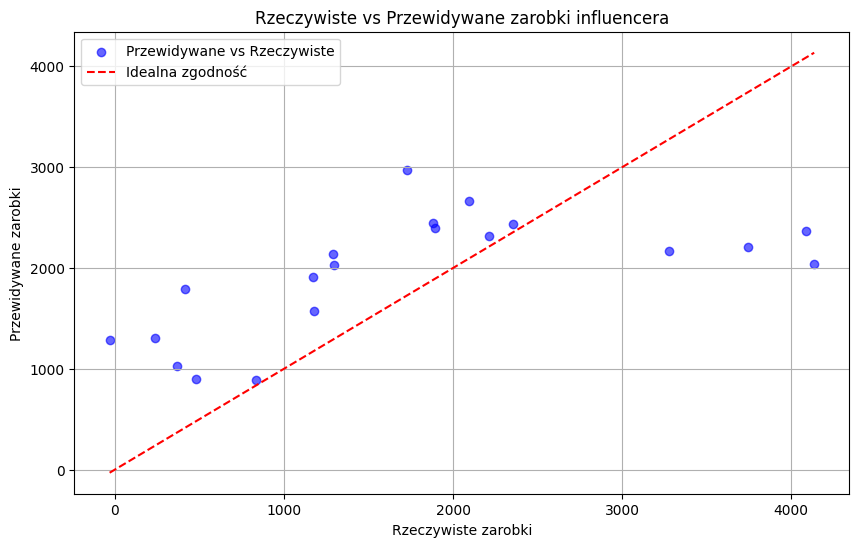

<Figure size 640x480 with 0 Axes>

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Przewidywane vs Rzeczywiste')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Idealna zgodność')

plt.xlabel('Rzeczywiste zarobki')
plt.ylabel('Przewidywane zarobki')
plt.title('Rzeczywiste vs Przewidywane zarobki influencera')
plt.legend()
plt.grid(True)
plt.show()

plt.savefig('results_plot.png')